# Importing Dependencies

**The Dataset is from a kaggle competetion called Digit Recognizer which is also why there is no labels for the test data but don't worry, I have given a visual representation of the true value corresponding to the predicted value at the end to visually validate the prediction**

In [37]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# Importing the Dataset

In [38]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv') # enter training data path
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv') # enter test data path

In [39]:
X_train = np.array(train.drop(labels=['label'], axis=1))
y_train = np.array(train['label'])

X_test = np.array(test)

# Preprocessing the Train and Test Dataset as per CNN input requirements

In [40]:
# One Hot Encoding the Labels as the models last layer expects it
# I found out that this was the case through a gruelling debugging process XD
y_train=to_categorical(y_train,num_classes=10)

In [41]:
# Reshaping the datasets
X_train = X_train.reshape(len(X_train), 28, 28, 1)
y_train = y_train.reshape(len(y_train), 10)

X_test = X_test.reshape(len(X_test), 28, 28, 1)

# to ensure that the input data has a consistent range and distribution,
# which helps the network to learn better and faster.
X_train = X_train/255
X_test = X_test/255

In [42]:
# making sure that the all the shapes are correct
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(42000, 28, 28, 1)
(42000, 10)
(28000, 28, 28, 1)


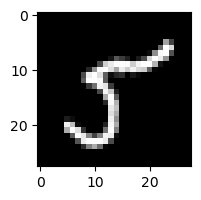

In [43]:
# Visually Representing a random image

idx = random.randint(0, len(X_train))

img = X_train[idx]

plt.figure(figsize=(2,2))
plt.imshow(img, cmap='gray')

# Model

In [44]:
model = Sequential([
    Conv2D(32, (1,1), activation='relu', input_shape=(28,28, 1)),
    
    Conv2D(32, (3,3), activation='relu'),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        64        
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 flatten_2 (Flatten)         (None, 21632)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1384512   
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,394,474
Trainable params: 1,394,474
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
657/657 [==============================] - 5s 5ms/step - loss: 0.2093 - accuracy: 0.9366
Epoch 2/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0615 - accuracy: 0.9806
Epoch 3/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0346 - accuracy: 0.9888
Epoch 4/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0189 - accuracy: 0.9937
Epoch 5/10
657/657 [==============================] - 4s 5ms/step - loss: 0.0159 - accuracy: 0.9943
Epoch 6/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0107 - accuracy: 0.9964
Epoch 7/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0074 - accuracy: 0.9976
Epoch 8/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0093 - accuracy: 0.9967
Epoch 9/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0063 - accuracy: 0.9977
Epoch 10/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0051 - accuracy: 0.9981

Text(0.5, 1.0, 'Accuracy Plot')

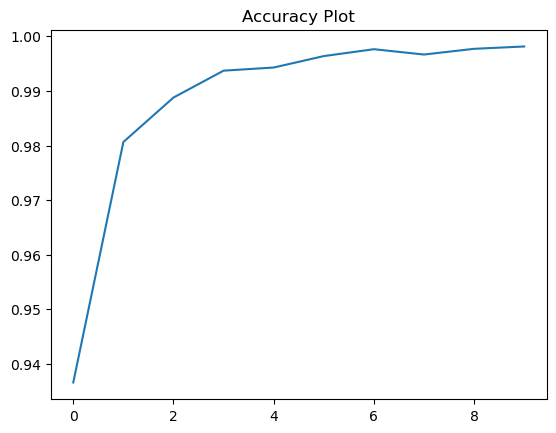

In [48]:
plt.plot(model.history.history['accuracy'])
plt.title('Accuracy Plot')

Text(0.5, 1.0, 'Loss Plot')

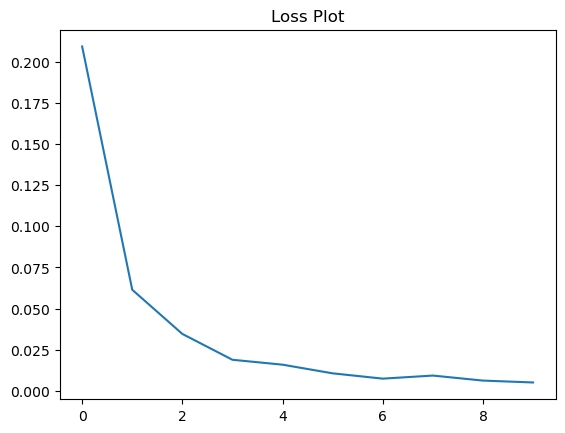

In [49]:
plt.plot(model.history.history['loss'])
plt.title('Loss Plot')

# Making Predictions

In [50]:
predictions = model.predict(X_test)
predictions

875/875 [==============================] - 2s 2ms/step


array([[1.92335984e-19, 5.51444600e-29, 1.00000000e+00, ...,
        4.17559132e-16, 2.55998819e-22, 8.07993641e-19],
       [9.99991894e-01, 1.51389249e-22, 2.18638093e-14, ...,
        1.39386369e-09, 5.49890793e-11, 1.23750676e-10],
       [2.69837690e-19, 2.90116747e-14, 2.89274132e-10, ...,
        8.79273809e-09, 2.49844703e-07, 9.99999642e-01],
       ...,
       [5.44509429e-27, 1.25225235e-25, 1.92732605e-19, ...,
        1.02706235e-23, 5.77502090e-19, 7.76892002e-18],
       [1.14231890e-15, 3.59884083e-17, 3.11634995e-13, ...,
        1.17714741e-10, 9.12894899e-11, 9.99999881e-01],
       [1.95327729e-25, 4.77575729e-23, 1.00000000e+00, ...,
        1.09610457e-15, 1.29672446e-16, 1.95607489e-16]], dtype=float32)

**Making a Function to properly represent the prediction that is understandable**

In [51]:
def result(prediction, idx):
    assert idx < len(X_test)
    assert idx >= 0
    pred = prediction[idx]
    print(f"Predicted Digit: {pred.argmax()}\n\n")
    print("Actual Digit: ")
    plt.imshow(X_test[idx], cmap='gray')

Predicted Digit: 7


Actual Digit: 


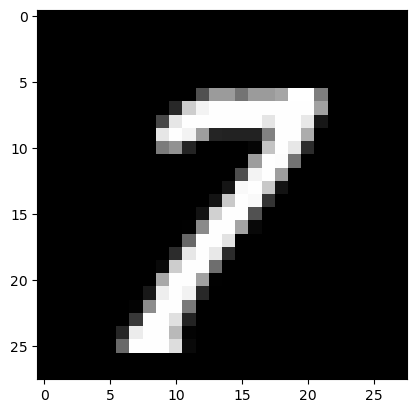

In [52]:
# Change the index for predictions of different images in the test set
# However, note that the values of index can be in the range [0,len(X_test)) 
# and if an index out of the scope is entered, the function will throw an assertion error
result(predictions, 6969)